1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Sampling Your Data
4. Build Model
    4. a. Try DecisionTree, RandomForest
    4. b. Try other tree-based model like: XGBoost, CatBoost
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What is your main model as well as their params and why?


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information
Browsing behavior
Historical purchase data among other information
It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

## Load Dataset

In [1]:
!pip install -U pandas_profiling
!pip install -U pandas
!pip install -U xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 40.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 101.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 35.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 60.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 77.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=59d9ebdf8ef6b0e9be865fb347fd3339815750b95425e

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 96.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.1.2 requires pandas!=1.4.0,<1.6,>1.1, but you have pandas 2.0.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.5.3, but you have pandas 2.0.1 which is incompatible.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
def read_dataset(path):
    df = pd.read_csv(path)
    display(df.head())
    display(df.describe())
    return df

PATH = "/content/drive/MyDrive/Introduction to ML/Homework/HomeWork-churn_rate_prediction.csv" # Path to your file

df = read_dataset(PATH)
df.head()
#ToDo: Show histogram of dataframe

customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  ... avg_time_spent  \
0                      No    xxxxxxxx  ...         300.63   
1                       ?    CID21329  ...         306.34   
2                     Yes    CID12313  ...         516.16   
3                     Yes     CID3793  ...          53.27   
4                      No    xxxxxxxx  ...         113.13   

  avg_transaction_value avg_frequency_login_days points_in_wallet  \
0              53005.25                     17.0           781.75   
1              12838.38                     10.0              NaN   
2              21027.00                     22.0           500.69   
3              25239.56                      6.0           567.66   
4              24483.66                     16.0           663.06   

   used_special_discount  offer_application_preference  past_complaint  \
0                    Yes                           Yes              No   
1                    Yes                            No             Yes   
2                     No                           Yes             Yes   
3                     No                           Yes             Yes   
4                     No                           Yes             Yes   

      complaint_status                  feedback churn_risk_score  
0       Not Applicable  Products always in Stock                2  
1               Solved     Quality Customer Care                1  
2  Solved in Follow-up              Poor Website                5  
3             Unsolved              Poor Website                5  
4               Solved              Poor Website                5  

[5 rows x 25 columns]

age  days_since_last_login  avg_time_spent  \
count  36992.000000           36992.000000    36992.000000   
mean      37.118161             -41.915576      243.472334   
std       15.867412             228.819900      398.289149   
min       10.000000            -999.000000    -2814.109110   
25%       23.000000               8.000000       60.102500   
50%       37.000000              12.000000      161.765000   
75%       51.000000              16.000000      356.515000   
max       64.000000              26.000000     3235.578521   

       avg_transaction_value  points_in_wallet  churn_risk_score  
count           36992.000000      33549.000000      36992.000000  
mean            29271.194003        686.882199          3.463397  
std             19444.806226        194.063624          1.409661  
min               800.460000       -760.661236         -1.000000  
25%             14177.540000        616.150000          3.000000  
50%             27554.485000        697.620000          4.000000  
75%             40855.110000        763.950000          5.000000  
max             99914.050000       2069.069761          5.000000

customer_id              Name  age gender  \
0      fffe4300490044003600300030003800   Pattie Morrisey   18      F   
1  fffe43004900440032003100300035003700       Traci Peery   32      F   
2      fffe4300490044003100390032003600   Merideth Mcmeen   44      F   
3  fffe43004900440036003000330031003600  Eufemia Cardwell   37      M   
4  fffe43004900440031003900350030003600      Meghan Kosak   31      F   

  security_no region_category  membership_category joining_date  \
0     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1     5K0N3X1            City   Premium Membership   2017-08-28   
2     1F2TCL3            Town        No Membership   2016-11-11   
3     VJGJ33N            City        No Membership   2016-10-29   
4     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id  ... avg_time_spent  \
0                      No    xxxxxxxx  ...         300.63   
1                       ?    CID21329  ...         306.34   
2                     Yes    CID12313  ...         516.16   
3                     Yes     CID3793  ...          53.27   
4                      No    xxxxxxxx  ...         113.13   

  avg_transaction_value avg_frequency_login_days points_in_wallet  \
0              53005.25                     17.0           781.75   
1              12838.38                     10.0              NaN   
2              21027.00                     22.0           500.69   
3              25239.56                      6.0           567.66   
4              24483.66                     16.0           663.06   

   used_special_discount  offer_application_preference  past_complaint  \
0                    Yes                           Yes              No   
1                    Yes                            No             Yes   
2                     No                           Yes             Yes   
3                     No                           Yes             Yes   
4                     No                           Yes             Yes   

      complaint_status                  feedback churn_risk_score  
0       Not Applicable  Products always in Stock                2  
1               Solved     Quality Customer Care                1  
2  Solved in Follow-up              Poor Website                5  
3             Unsolved              Poor Website                5  
4               Solved              Poor Website                5  

[5 rows x 25 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [4]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]

In [5]:
print(categorical_cols)
print(numerical_cols)

['customer_id', 'Name', 'gender', 'security_no', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'referral_id', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'avg_frequency_login_days', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']
['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']


In [7]:
from pandas_profiling import ProfileReport
ProfileReport(df)

<ipython-input-7-4e02e4c39c57>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Data Analysis

In [8]:
# Data analysis
# Todo: analyze your data here

In [6]:
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

<Axes: >

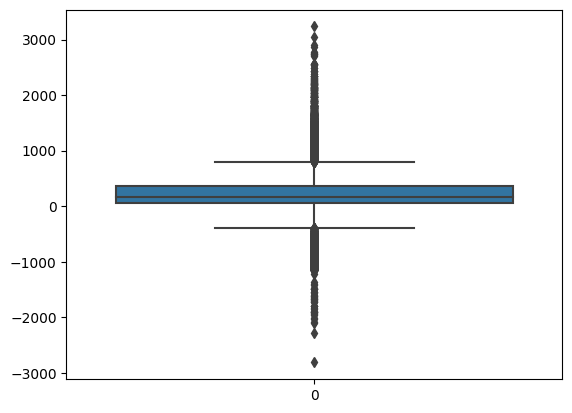

In [7]:
sns.boxplot(df['avg_time_spent'])
# arr1 = np.array(df['avg_time_spent'] < 0)

<Axes: >

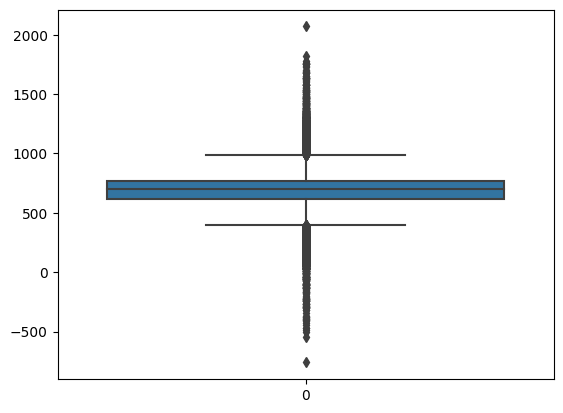

In [11]:
sns.boxplot(df['points_in_wallet'])
# arr2 = np.array(df['points_in_wallet'] < 0)

## Preprocessing

In [8]:
index1 = df[df["days_since_last_login"]<0].index
index2 = df[df["points_in_wallet"]<0].index
index3 = df[df["avg_time_spent"] < 0].index

In [9]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df.drop("customer_id", axis=1, inplace=True)
    df.drop("Name", axis=1, inplace=True)
    df.drop("security_no", axis=1, inplace=True)
    df.drop("referral_id", axis=1, inplace=True)
    df.drop("joining_date", axis=1, inplace=True)
    df.drop("last_visit_time", axis=1, inplace=True)
    # df.dropna(inplace=True)
    # cols = ['gender']
    # for col in cols:
    #   df.drop(df[df[col] == 'Unknown' | df[col] == '?'].index, axis=0, inplace=True)
    df.drop(df[df["days_since_last_login"]<0].index,axis = 0,inplace=True)
    df.drop(df[df["points_in_wallet"]<0].index,axis=0, inplace=True)
    df.drop(df[df["avg_time_spent"] < 0].index,axis=0, inplace=True)
    df.drop(df[df["churn_risk_score"]==-1].index, axis=0, inplace=True)
    df.dropna(inplace=True)
    
    return df

In [10]:
df = preprocessing_data(df.copy())
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24631 entries, 0 to 36991
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           24631 non-null  int64  
 1   gender                        24631 non-null  object 
 2   region_category               24631 non-null  object 
 3   membership_category           24631 non-null  object 
 4   joined_through_referral       24631 non-null  object 
 5   preferred_offer_types         24631 non-null  object 
 6   medium_of_operation           24631 non-null  object 
 7   internet_option               24631 non-null  object 
 8   days_since_last_login         24631 non-null  int64  
 9   avg_time_spent                24631 non-null  float64
 10  avg_transaction_value         24631 non-null  float64
 11  avg_frequency_login_days      24631 non-null  object 
 12  points_in_wallet              24631 non-null  float64
 13  u

In [11]:
df.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [12]:
df.head()

age gender region_category  membership_category joined_through_referral  \
0   18      F         Village  Platinum Membership                      No   
2   44      F            Town        No Membership                     Yes   
3   37      M            City        No Membership                     Yes   
4   31      F            City        No Membership                      No   
5   13      M            City      Gold Membership                      No   

      preferred_offer_types medium_of_operation internet_option  \
0     Gift Vouchers/Coupons                   ?           Wi-Fi   
2     Gift Vouchers/Coupons             Desktop           Wi-Fi   
3     Gift Vouchers/Coupons             Desktop     Mobile_Data   
4  Credit/Debit Card Offers          Smartphone     Mobile_Data   
5     Gift Vouchers/Coupons                   ?           Wi-Fi   

   days_since_last_login  avg_time_spent  avg_transaction_value  \
0                     17          300.63               53005.25   
2                     14          516.16               21027.00   
3                     11           53.27               25239.56   
4                     20          113.13               24483.66   
5                     23          433.62               13884.77   

  avg_frequency_login_days  points_in_wallet used_special_discount  \
0                     17.0            781.75                   Yes   
2                     22.0            500.69                    No   
3                      6.0            567.66                    No   
4                     16.0            663.06                    No   
5                     24.0            722.27                   Yes   

  offer_application_preference past_complaint     complaint_status  \
0                          Yes             No       Not Applicable   
2                          Yes            Yes  Solved in Follow-up   
3                          Yes            Yes             Unsolved   
4                          Yes            Yes               Solved   
5                           No            Yes             Unsolved   

                   feedback  churn_risk_score  
0  Products always in Stock                 2  
2              Poor Website                 5  
3              Poor Website                 5  
4              Poor Website                 5  
5       No reason specified                 3

## Feature Engineering

<Axes: >

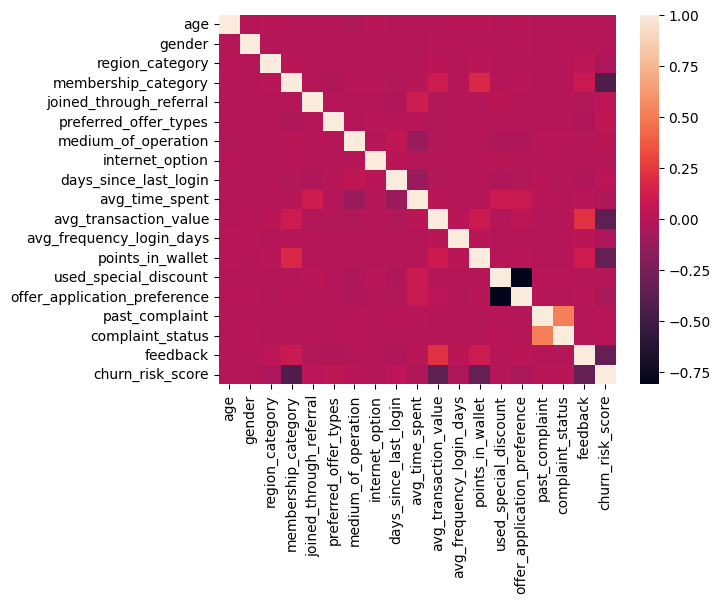

In [13]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    new_df = df.copy()
    for col in new_df.select_dtypes(include=['object']).columns:
        new_df[col] = new_df[col].astype('category').cat.codes
    return new_df

df = apply_feature_engineering(df)
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [14]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    feature_names = df.columns.tolist()
    feature_names.remove("churn_risk_score")

    X = df[feature_names].values
    y = df.churn_risk_score.values
    return X, y

X, y = prepare_X_y(df)

# Apply machine learning model

## Train-test split

In [15]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 1
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_oversampling, y_train_oversampling = smote.fit_resample(trainX, trainY)

## Build SK-learn model

In [21]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    clf = DecisionTreeClassifier()
    pipe = Pipeline(steps=[("tree", clf)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
    param_grid = {
    'tree__criterion': ["gini", "entropy", "log_loss"]
    }

    search = GridSearchCV(pipe, param_grid, scoring="recall", n_jobs=2)
    search.fit(trainX, trainY)
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)
    # Todo: fit your model with X, y
    return search

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("precision", precision_score(y_true, y_pred, average = 'micro'))
    print("recall", recall_score(y_true, y_pred, average = 'micro'))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred, average = 'micro'))
    print("\n", classification_report(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = accuracy_score(y_true, y_pred)
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)
calculate_performance(testY, model.predict(testX))

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


Best parameter (CV score=nan):
{'tree__criterion': 'gini'}
precision 0.7820027063599458
recall 0.7820027063599458
accuracy 0.7820027063599458
F1 0.7820027063599458

               precision    recall  f1-score   support

           1       0.72      0.79      0.75       521
           2       0.80      0.73      0.76       608
           3       0.92      0.92      0.92      2151
           4       0.69      0.68      0.68      2109
           5       0.75      0.76      0.75      2001

    accuracy                           0.78      7390
   macro avg       0.77      0.77      0.77      7390
weighted avg       0.78      0.78      0.78      7390



0.7820027063599458

In [22]:
#Sử dụng upsampling data
DTmodel = build_model(X_train_oversampling, y_train_oversampling)
print("Best parameter (CV score=%0.3f):" % DTmodel.best_score_)
print(DTmodel.best_params_)
# Compare on training dataset
pred = DTmodel.predict(testX)
print(pred)
calculate_performance(testY, pred)

Best parameter (CV score=nan):
{'tree__criterion': 'gini'}
Best parameter (CV score=nan):
{'tree__criterion': 'gini'}
[4 4 1 ... 5 4 1]
precision 0.7855209742895806
recall 0.7855209742895806
accuracy 0.7855209742895806
F1 0.7855209742895806

               precision    recall  f1-score   support

           1       0.72      0.78      0.75       521
           2       0.79      0.74      0.76       608
           3       0.92      0.92      0.92      2151
           4       0.69      0.69      0.69      2109
           5       0.75      0.76      0.76      2001

    accuracy                           0.79      7390
   macro avg       0.78      0.78      0.78      7390
weighted avg       0.79      0.79      0.79      7390



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(


0.7855209742895806

In [23]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

def build_RF(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    clf = RandomForestClassifier()
    #pipe = Pipeline(steps=[("tree", clf)]) #Build a pipeline with a scaler and a model

# Parameters of pipelines can be set using '__' separated parameter names:
    param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [int(x) for x in np.linspace(10, 120, num = 12)],
    'min_samples_split' : [2, 6, 10], # minimum sample number to split a node
    'min_samples_leaf' : [1, 3, 4], # minimum sample number that can be stored in a leaf node
    'bootstrap' : [True, False] # method used to sample data points
    } 

    rf_random = RandomizedSearchCV(estimator = clf,param_distributions = param_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
    rf_random.fit(trainX, trainY)
    print("Best parameter (CV score=%0.3f):" % rf_random.best_score_)
    print(rf_random.best_params_)
    # Todo: fit your model with X, y
    return rf_random

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("precision", precision_score(y_true, y_pred, average = 'micro'))
    print("recall", recall_score(y_true, y_pred, average = 'micro'))
    print("accuracy", accuracy_score(y_true, y_pred))
    print("F1", f1_score(y_true, y_pred, average = 'micro'))
    print("\n", classification_report(y_true, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = accuracy_score(y_true, y_pred)
    return main_score

model = build_RF(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)
calculate_performance(testY, model.predict(testX))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameter (CV score=0.795):
{'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 70, 'bootstrap': True}
precision 0.7918809201623817
recall 0.7918809201623817
accuracy 0.7918809201623817
F1 0.7918809201623817

               precision    recall  f1-score   support

           1       0.71      0.87      0.78       521
           2       0.86      0.68      0.76       608
           3       0.92      0.94      0.93      2151
           4       0.73      0.62      0.67      2109
           5       0.72      0.82      0.77      2001

    accuracy                           0.79      7390
   macro avg       0.79      0.79      0.78      7390
weighted avg       0.79      0.79      0.79      7390



0.7918809201623817

In [24]:
#sử dụng upsampling data
model = build_RF(X_train_oversampling, y_train_oversampling)
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)
# Compare on training dataset
pred = model.predict(testX)
print(pred)
calculate_performance(testY, pred)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameter (CV score=0.797):
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
Best parameter (CV score=0.797):
{'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
[5 4 1 ... 5 5 1]
precision 0.787956698240866
recall 0.787956698240866
accuracy 0.787956698240866
F1 0.787956698240866

               precision    recall  f1-score   support

           1       0.68      0.92      0.78       521
           2       0.90      0.63      0.74       608
           3       0.92      0.94      0.93      2151
           4       0.76      0.57      0.65      2109
           5       0.70      0.87      0.78      2001

    accuracy                           0.79      7390
   macro avg       0.79      0.79      0.78      7390
weighted avg       0.80      0.79      0.78      7390



0.787956698240866

In [17]:
!pip install xgboost
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.6 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

def build_xgboost_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """
    model = xgb.XGBClassifier()
    # Todo: Input your scaler and logistic model into pipeline
    model = Pipeline(steps=[('xgb', model)])
    # Todo: fit your model with X, y

    param_grids = {
        'xgb__n_estimators': [25, 50, 100, 150],
        'xgb__max_depth': [int(x) for x in np.linspace(10, 120, num = 12)]
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state = RANDOM_STATE)
    grid = GridSearchCV(model, param_grids, n_jobs=-1, cv=cv)
    grid.fit(X,y)
    return grid

model = build_xgboost_model(trainX, trainY)
print("Best parameter (CV score=%0.3f):" % model.best_score_)
print(model.best_params_)
# Compare on training dataset
pred = model.predict(testX)
calculate_performance(testY, pred)

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier()
model.fit(trainX, trainY)
pred = model.predict(testX)
calculate_performance(testY, pred)

In [3]:
def get_conclusion():
    # Todo: Please return your answer, conclusion and opinion right here
    return "7. My main metric is accuracy score since we need to give the accurate prediction about people who are likely to cancel their subscription" \
           "And my main model is XGBoost since we have the better accuracy on the first try, but at that time i can't have enough time to execute again."

get_conclusion()

"7. My main metric is accuracy score since we need to give the accurate prediction about people who are likely to cancel their subscriptionAnd my main model is XGBoost since we have the better accuracy on the first try, but at that time i can't have enough time to execute again."